In [1]:
import yfinance as yahooFinance
import pandas as pd
import numpy as np
from scipy.stats import norm

In [2]:
ticker_symbol = "^GSPC"
start_date = "2005-12-31"
end_date = "2020-12-31"
sp500_data = yahooFinance.download(ticker_symbol, start=start_date, end=end_date, interval="1d")
# sp500_data.to_excel('data.xlsx')

[*********************100%%**********************]  1 of 1 completed


In [3]:
sp500_data['Adjusted_Return'] = sp500_data['Adj Close'].pct_change()
sp500_data.drop(['Open','High','Low','Close','Volume'], inplace = True, axis = 1)

In [4]:
sp500_data['rolling_vol'] = sp500_data['Adjusted_Return'].rolling(window=10).std()
sp500_data.dropna(inplace = True)

In [5]:
sp500_data

,Adj Close,Adjusted_Return,rolling_vol
Date,,,
2006-01-18,1277.930054,-0.003897,0.004611
2006-01-19,1285.040039,0.005564,0.004781
2006-01-20,1261.489990,-0.018326,0.007757
2006-01-23,1263.819946,0.001847,0.006969
2006-01-24,1266.859985,0.002405,0.006873
...,...,...,...
2020-12-23,3690.010010,0.000746,0.005330
2020-12-24,3703.060059,0.003537,0.005370
2020-12-28,3735.360107,0.008723,0.005820


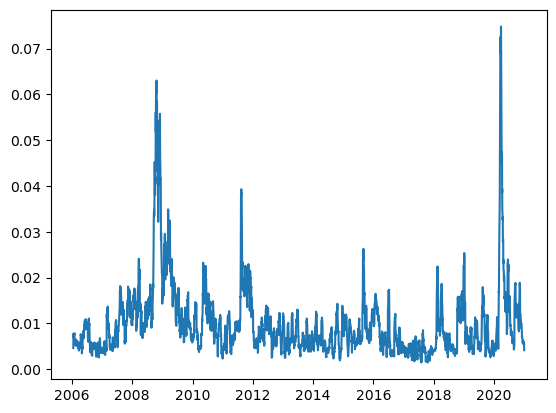

In [6]:
import matplotlib.pyplot as plt
plt.plot(sp500_data['rolling_vol'])
plt.show()

In [26]:
li = pd.DataFrame()
rounding_bases = [25]
def round_to_nearest(x, base):
    return base * round(x / base)

for base in rounding_bases:
    sp500_data['Rounded_to_25'] = sp500_data['Adj Close'].apply(lambda x: round_to_nearest(x, base))
sp500_data

,Adj Close,Adjusted_Return,rolling_vol,Rounded_to_25
Date,,,,
2006-01-18,1277.930054,-0.003897,0.004611,1275
2006-01-19,1285.040039,0.005564,0.004781,1275
2006-01-20,1261.489990,-0.018326,0.007757,1250
2006-01-23,1263.819946,0.001847,0.006969,1275
2006-01-24,1266.859985,0.002405,0.006873,1275
...,...,...,...,...
2020-12-23,3690.010010,0.000746,0.005330,3700
2020-12-24,3703.060059,0.003537,0.005370,3700
2020-12-28,3735.360107,0.008723,0.005820,3725


In [46]:
new_data = pd.DataFrame(columns=['Adj Close', 'Adjusted_Return', 'rolling_vol','Rounded_to_25'])
# new_data['Strike'] = 0

for index,row in sp500_data.iloc[1:].iterrows():
    print(row[3]*0.07)
#     break
#     for j in range(int(row[3]*0.07)): #below
#         print(j)
#         new_data.append(i)
#         new_data['Rounded_to_25'] = row[3] - j*5
#     for k in range(int(i['Rounded_to_25']*0.07)):
#         new_data.append(i)
#         new_data['Rounded_to_25'] = row[3] + j*5
# new_data

89.25000000000001
87.50000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
87.50000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
91.00000000000001
89.25000000000001
89.25000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
89.25000000000001
91.00000000000001
91.00000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
89.25000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.00000000000001
91.0000000

In [7]:
sp500_data.to_excel('data_sp500.xlsx')

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    Parameters:
        S (float): Current stock price
        K (float): Strike price
        T (float): Time to expiration (in years)
        r (float): Risk-free interest rate (annualized)
        sigma (float): Volatility of the underlying stock (annualized)
        option_type (str): 'call' for call option, 'put' for put option (default is 'call')

    Returns:
        float: Option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be 'call' or 'put'.")

    return option_price

# Example usage:
S0 = 100  # Current stock price
K = 100   # Strike price
T = 1     # Time to expiration (in years)
r = 0.05  # Risk-free interest rate (5%)
sigma = 0.2  # Volatility (20%)

call_option_price = black_scholes(S0, K, T, r, sigma, option_type='call')
put_option_price = black_scholes(S0, K, T, r, sigma, option_type='put')

print(f"Call Option Price: {call_option_price:.2f}")
print(f"Put Option Price: {put_option_price:.2f}")
